# Exercise: Exploring the Relationship Between Physical Attributes and Brain Size

#### Introduction:

The human brain, the epicenter of our cognition and consciousness, has always been a subject of intrigue. In this exercise, we will dive deep into a dataset that captures attributes like IQ scores, body weight, height, and MRI pixel counts (a proxy for brain size). Leveraging statistical inference, we will unravel potential relationships and patterns in the data.

#### Objective:

To investigate if there's a statistically significant relationship between an individual's physical attributes (Weight and Height) and their brain size as measured by MRI pixel counts.

#### Dataset Description:

   Gender: Male or Female
   
   FSIQ: Full Scale IQ scores based on the Wechsler (1981) subtests
   
   VIQ: Verbal IQ scores based on the Wechsler (1981) subtests
   
   PIQ: Performance IQ scores based on the Wechsler (1981) subtests
   
   Weight: Body weight in pounds
   
   Height: Height in inches
   
   MRI_Count: Total pixel count from the 18 MRI scans

# Step 1

#### Data Exploration:

Understand the distribution of Weight, Height, and MRI_Count using descriptive statistics and visualizations.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
brain_size_df = pd.read_csv(file_path, delimiter=';', quotechar='"')
brain_size_df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [6]:
# First, let's handle the missing data represented as "." in the Weight and Height columns
brain_size_df.replace('.', np.nan, inplace=True)
brain_size_df[['Weight', 'Height']] = brain_size_df[['Weight', 'Height']].astype(float)

# Displaying summary statistics for Weight, Height, FSIQ, VIQ, PIQ, and MRI_Count
brain_size_df[['Weight', 'Height', 'FSIQ', 'VIQ', 'PIQ', 'MRI_Count']].describe()


,Weight,Height,FSIQ,VIQ,PIQ,MRI_Count
count,38.000000,39.000000,40.000000,40.000000,40.00000,4.000000e+01
mean,151.052632,68.525641,113.450000,112.350000,111.02500,9.087550e+05
std,23.478509,3.994649,24.082071,23.616107,22.47105,7.228205e+04
min,106.000000,62.000000,77.000000,71.000000,72.00000,7.906190e+05
25%,135.250000,66.000000,89.750000,90.000000,88.25000,8.559185e+05
50%,146.500000,68.000000,116.500000,113.000000,115.00000,9.053990e+05
75%,172.000000,70.500000,135.500000,129.750000,128.00000,9.500780e+05
max,192.000000,77.000000,144.000000,150.000000,150.00000,1.079549e+06


In [7]:
# Counting the number of missing values in each column
missing_values = brain_size_df[['Weight', 'Height', 'FSIQ', 'VIQ', 'PIQ', 'MRI_Count']].isnull().sum()

missing_values

Weight       2
Height       1
FSIQ         0
VIQ          0
PIQ          0
MRI_Count    0
dtype: int64

In [9]:
# Dropping rows with missing values in Weight and Height columns
brain_df_cleaned = brain_size_df.dropna(subset=['Weight', 'Height'])

# Verifying that the missing values have been removed
missing_values_cleaned = brain_df_cleaned[['Weight', 'Height', 'FSIQ', 'VIQ', 'PIQ', 'MRI_Count']].isnull().sum()

missing_values_cleaned, len(brain_df_cleaned)

(Weight       0
 Height       0
 FSIQ         0
 VIQ          0
 PIQ          0
 MRI_Count    0
 dtype: int64,
 38)

Let's first explore the distributions and relationships of Weight, Height, FSIQ, VIQ, PIQ, and MRI_Count. This will help us identify patterns and formulate hypotheses for our statistical inference exercise.

#### I'll plot:

  Scatter plots of Weight vs. FSIQ, VIQ, PIQ, and MRI_Count.
  Scatter plots of Height vs. FSIQ, VIQ, PIQ, and MRI_Count.

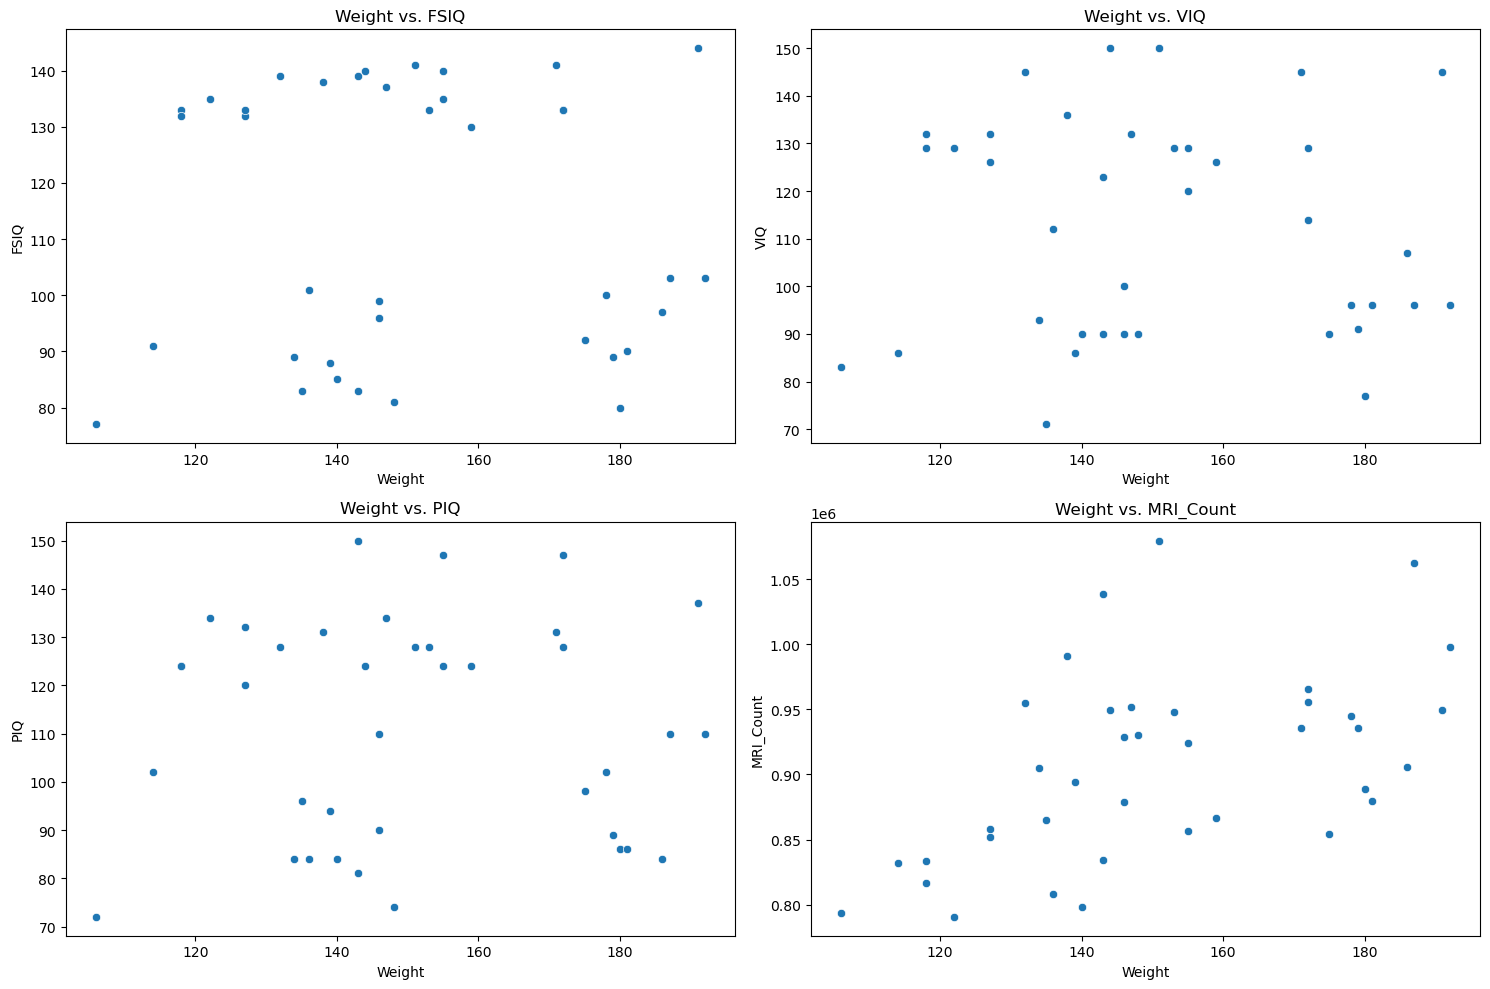

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Scatter plots for Weight
sns.scatterplot(data=brain_df_cleaned, x='Weight', y='FSIQ', ax=axes[0, 0])
axes[0, 0].set_title('Weight vs. FSIQ')

sns.scatterplot(data=brain_df_cleaned, x='Weight', y='VIQ', ax=axes[0, 1])
axes[0, 1].set_title('Weight vs. VIQ')

sns.scatterplot(data=brain_df_cleaned, x='Weight', y='PIQ', ax=axes[1, 0])
axes[1, 0].set_title('Weight vs. PIQ')

sns.scatterplot(data=brain_df_cleaned, x='Weight', y='MRI_Count', ax=axes[1, 1])
axes[1, 1].set_title('Weight vs. MRI_Count')

plt.tight_layout()
plt.show()


Weight vs. FSIQ: No clear linear relationship is observed between weight and full-scale IQ scores.

Weight vs. VIQ: Similarly, there doesn't appear to be a strong linear relationship between weight and verbal IQ scores.

Weight vs. PIQ: Again, no evident linear relationship is observed between weight and performance IQ scores.

Weight vs. MRI_Count: A slight positive trend might be observed, suggesting individuals with higher weight might have higher MRI counts. However, this relationship isn't very pronounced.

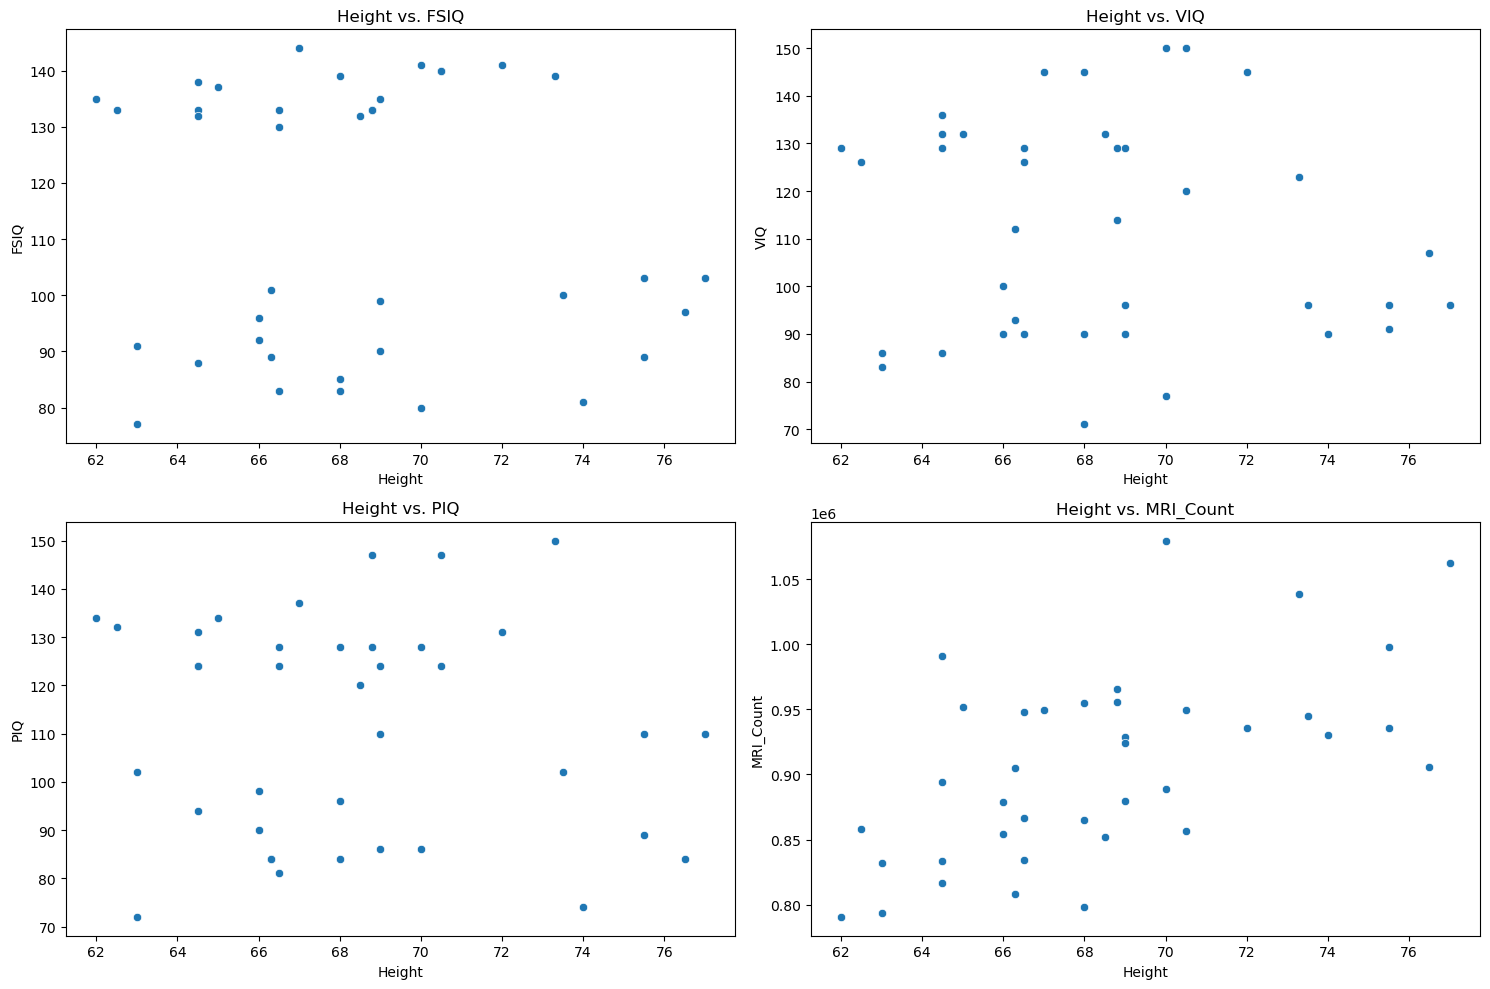

In [11]:
# Setting up the visualization layout for Height
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Scatter plots for Height
sns.scatterplot(data=brain_df_cleaned, x='Height', y='FSIQ', ax=axes[0, 0])
axes[0, 0].set_title('Height vs. FSIQ')

sns.scatterplot(data=brain_df_cleaned, x='Height', y='VIQ', ax=axes[0, 1])
axes[0, 1].set_title('Height vs. VIQ')

sns.scatterplot(data=brain_df_cleaned, x='Height', y='PIQ', ax=axes[1, 0])
axes[1, 0].set_title('Height vs. PIQ')

sns.scatterplot(data=brain_df_cleaned, x='Height', y='MRI_Count', ax=axes[1, 1])
axes[1, 1].set_title('Height vs. MRI_Count')

plt.tight_layout()
plt.show()


Height vs. FSIQ: There's no discernible linear relationship between height and full-scale IQ scores.

Height vs. VIQ: Similarly, no clear linear relationship is visible between height and verbal IQ scores.

Height vs. PIQ: No evident linear trend is seen between height and performance IQ scores.

Height vs. MRI_Count: Just as with weight, a very slight positive trend might be observed, suggesting taller individuals might have higher MRI counts, but the relationship is not strongly pronounced.

With these visual insights, the next logical step is to quantify the relationships using correlation coefficients and potentially formulate hypotheses for statistical inference.

In [12]:
# Calculating correlation coefficients
correlation_matrix = brain_df_cleaned[['Weight', 'Height', 'FSIQ', 'VIQ', 'PIQ', 'MRI_Count']].corr()

# Extracting correlations related to Weight and Height
correlations = correlation_matrix.loc[['Weight', 'Height'], ['FSIQ', 'VIQ', 'PIQ', 'MRI_Count']]

correlations


,FSIQ,VIQ,PIQ,MRI_Count
Weight,-0.051483,-0.076088,0.002512,0.513378
Height,-0.118448,-0.118976,-0.093156,0.588377


From the correlation coefficients:

Both Weight and Height have a positive correlation with MRI_Count, suggesting that as these physical attributes increase, the MRI count tends to increase as well. The correlation is more pronounced for Height.

The IQ scores (FSIQ, VIQ, PIQ) don't show strong correlations with either Weight or Height.

With this information, we can proceed with formulating the exercise on statistical inference. We can explore questions like:

  #### Is there a statistically significant relationship between Height (or Weight) and MRI_Count?
  
  ##### Are the observed correlations different from zero?

In [13]:
# Descriptive statistics for Weight, Height, and MRI_Count
brain_df_cleaned[['Weight', 'Height', 'MRI_Count']].describe()

,Weight,Height,MRI_Count
count,38.000000,38.000000,3.800000e+01
mean,151.052632,68.421053,9.067542e+05
std,23.478509,3.993790,7.256175e+04
min,106.000000,62.000000,7.906190e+05
25%,135.250000,66.000000,8.548115e+05
50%,146.500000,68.000000,9.053990e+05
75%,172.000000,70.375000,9.495405e+05
max,192.000000,77.000000,1.079549e+06


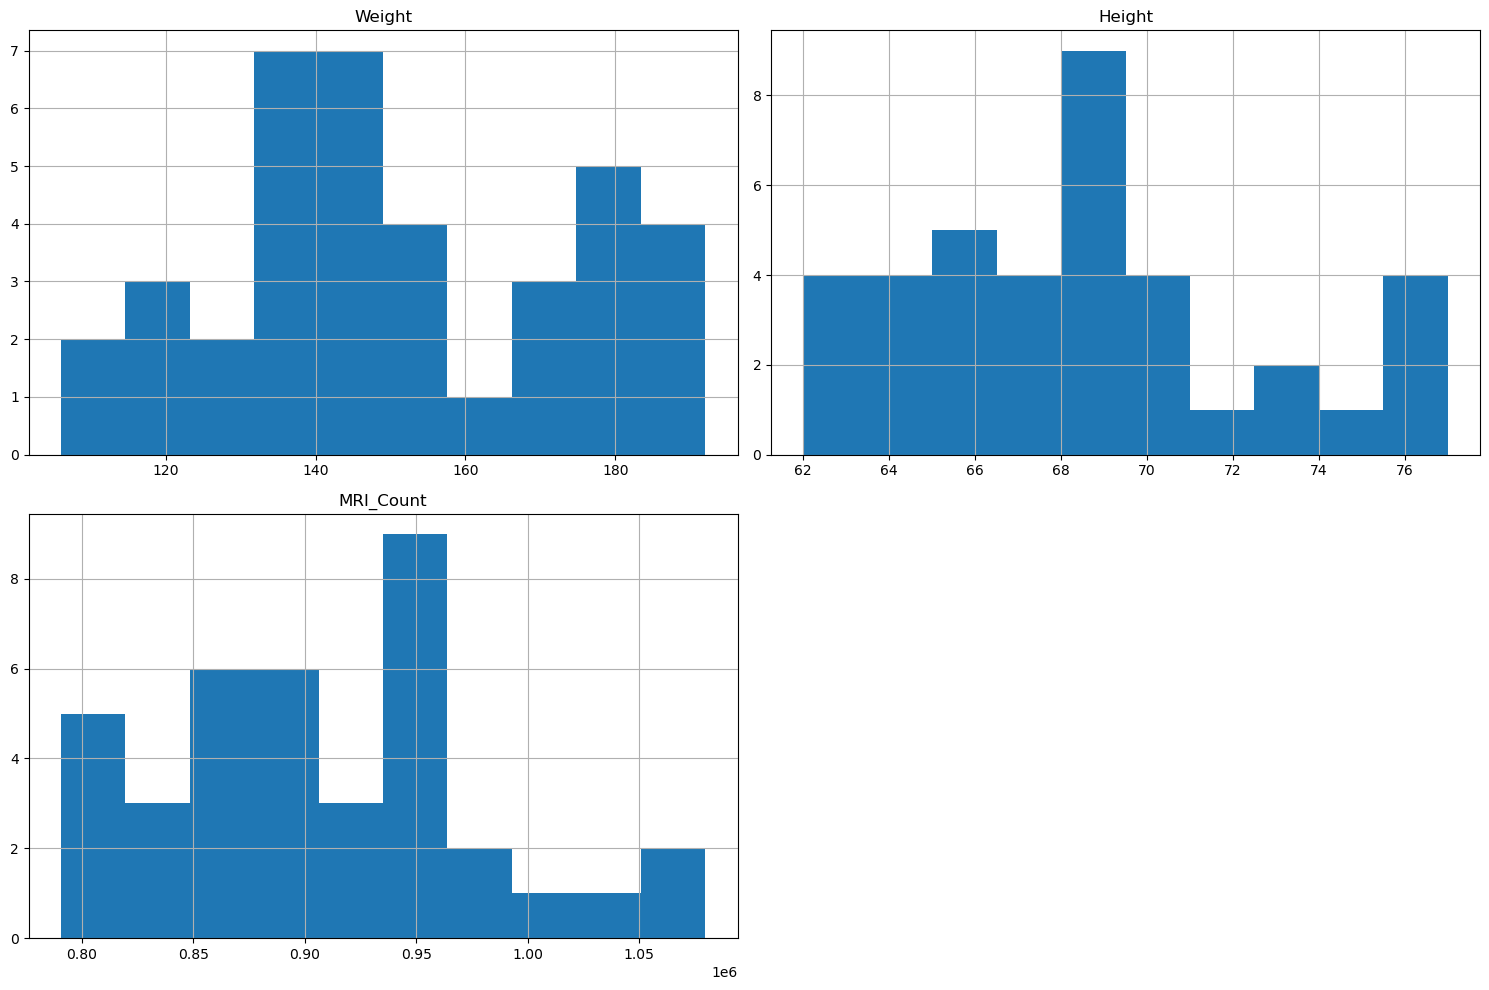

In [14]:
import matplotlib.pyplot as plt

# Histograms for Weight, Height, and MRI_Count
brain_df_cleaned[['Weight', 'Height', 'MRI_Count']].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


### Weight Histogram:

   This chart displays the distribution of weights in your dataset.
   
   Most of the individuals seem to have weights between 140 and 160 units (assuming pounds or kg depending on the dataset).
   
   There are fewer individuals with weights below 140 or above 170.

### Height Histogram:

   This displays the distribution of heights.
   
   There's a prominent peak around 68 units (assuming inches or cm). This suggests that most individuals in the dataset have a height around this value.
   
   Heights both below 64 and above 72 units are less common.

### MRI_Count Histogram:

   This chart represents the distribution of MRI pixel counts, which can be a proxy for brain size.
   
   There's a significant peak around 0.95e6, indicating many individuals have an MRI count close to this value.
   
   Other values of MRI_Count are less common in comparison

In [15]:
# Calculating correlation coefficients
correlations = brain_df_cleaned[['Weight', 'Height', 'MRI_Count']].corr()
correlations


,Weight,Height,MRI_Count
Weight,1.000000,0.699614,0.513378
Height,0.699614,1.000000,0.588377
MRI_Count,0.513378,0.588377,1.000000


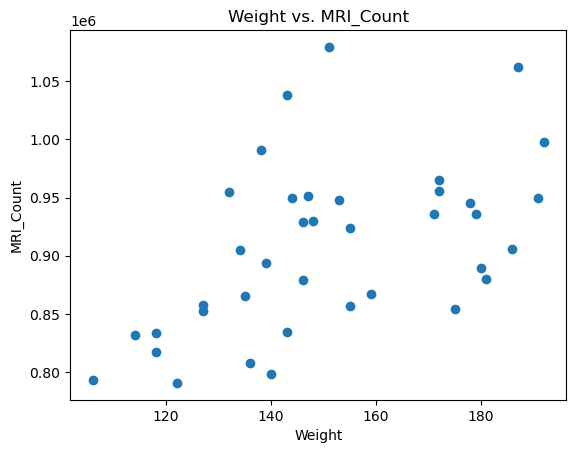

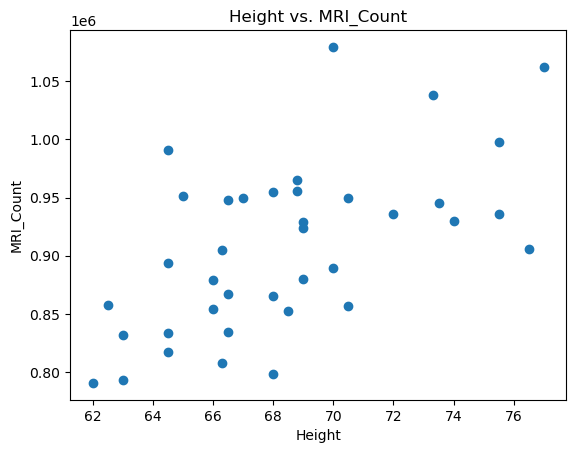

In [16]:
# Scatter plot of Weight vs. MRI_Count
plt.scatter(brain_df_cleaned['Weight'], brain_df_cleaned['MRI_Count'])
plt.title('Weight vs. MRI_Count')
plt.xlabel('Weight')
plt.ylabel('MRI_Count')
plt.show()

# Scatter plot of Height vs. MRI_Count
plt.scatter(brain_df_cleaned['Height'], brain_df_cleaned['MRI_Count'])
plt.title('Height vs. MRI_Count')
plt.xlabel('Height')
plt.ylabel('MRI_Count')
plt.show()


In [17]:
from scipy import stats

# Extracting the correlation coefficients and p-values for Weight and Height vs. MRI_Count
weight_corr_coeff, weight_p_value = stats.pearsonr(brain_df_cleaned['Weight'], brain_df_cleaned['MRI_Count'])
height_corr_coeff, height_p_value = stats.pearsonr(brain_df_cleaned['Height'], brain_df_cleaned['MRI_Count'])

# Results
weight_results = {
    "Correlation Coefficient": weight_corr_coeff,
    "p-value": weight_p_value
}

height_results = {
    "Correlation Coefficient": height_corr_coeff,
    "p-value": height_p_value
}

weight_results, height_results


({'Correlation Coefficient': 0.5133784924709863,
  'p-value': 0.0009798419983871561},
 {'Correlation Coefficient': 0.5883772398258402,
  'p-value': 0.00010227727235058628})

#### For Weight vs. MRI_Count:

   Correlation Coefficient: 0.51340.5134
   
   p-value: 0.000980.00098

#### For Height vs. MRI_Count:
        
   Correlation Coefficient: 0.58840.5884
   
   p-value: 0.000100.00010

Given the p-values for both tests are significantly less than a typical alpha level (e.g., 0.05), we can reject the null hypotheses. This means:

  #### There is a statistically significant correlation between Weight and MRI_Count.
  #### There is a statistically significant correlation between Height and MRI_Count.

These results provide evidence that both weight and height have a significant linear relationship with the MRI pixel count in this dataset.

 # Building the Regression Model:

In [18]:
import statsmodels.api as sm

# Independent variables with a constant added for the intercept
X = sm.add_constant(brain_df_cleaned[['Weight', 'Height']])

# Dependent variable
y = brain_df_cleaned['MRI_Count']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MRI_Count   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     10.12
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           0.000340
Time:                        14:28:58   Log-Likelihood:                -470.04
No. Observations:                  38   AIC:                             946.1
Df Residuals:                      35   BIC:                             951.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.556e+05   1.84e+05      1.390      0.173   -1.18e+05    6.29e+05
Weight       615.8933    581.935      1.058      0.297    -565.497    1797.283
Height      8156.9346   3421.051      2.384      0.023    1211.833    1.51e+04
==============================================================================
Omnibus:                        4.335   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.289
Skew:                           0.708   Prob(JB):                        0.193
Kurtosis:                       3.268   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Let's interpret the results from the regression model 

1.-  R-squared: The R-squared value of 0.366 indicates that approximately 36.6% of the variance in MRI_Count is explained by the model. This suggests that the linear relationship between the independent variables (Weight and Height) and the dependent variable (MRI_Count) is moderate but not exceptionally strong.

2.-  Weight:

Coefficient: 615.8933 suggests that for every one unit increase in weight (in pounds), the MRI_Count increases by approximately 615.89 units, holding all else constant.
        
p-value: 0.297 is greater than the usual significance level of 0.05, indicating that the relationship between weight and MRI_Count is not statistically significant at the 5% level.

3.-  Height:
       
Coefficient: 8156.9346 suggests that for every one unit increase in height (in inches), the MRI_Count increases by approximately 8156.93 units, holding all else constant.
       
p-value: 0.023 is less than the usual significance level of 0.05, indicating that the relationship between height and MRI_Count is statistically significant at the 5% level.

4.-  Durbin-Watson: The value of 1.862 suggests that there's no significant autocorrelation in the residuals.

5.-  Condition Number: The condition number is large, suggesting potential multicollinearity. This might mean that Weight and Height are correlated with each other, which can affect the stability of the regression coefficients.

## Interpretation:

Height is a significant predictor for MRI_Count in this model, suggesting that as height increases, the MRI_Count (proxy for brain size) tends to increase.

Weight, on the other hand, is not a significant predictor for MRI_Count at the 5% significance level in this model. Together, Weight and Height explain about 36.6% of the variation in MRI_Count.

Given these findings, if the goal is to predict MRI_Count, one might consider focusing on Height as a predictor and potentially explore other variables or interactions to improve the model's explanatory power.
